### Predicting Stock Prices using ML Regressors
1. SVR
2. Polynomial regessor
3. Ridge Regressor
4. LASSO Regressor
5. PLS Regressor
6. Random forest Regressor

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from datetime import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, max_error
import math

### Loading data

In [2]:
data = pd.read_csv('C:/Users/marri/Documents/MS-DS/Research Methodology/Research Paper/Finance and Stock Market/Financial Sentiment Analysis and Investment Strategies/Financial_Prediction_ML_DL_Saima/fwddatafiles/FTSE_TECH_IND.csv')
data.head()

,open,close,high,low,volume,sma_10,wma_10,ema_10,boll_ub,boll_lb,...,ppo,roc,rsi,stoch,stochrsi,ultosc,wr,medprice,typprice,wclprice
0,4814.299805,4847.000000,4851.600098,4809.399902,1613071800,0.0,0.0,4847.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4830.500000,4836.000000,4838.750000
1,4847.000000,4806.000000,4847.000000,4806.000000,1802853600,0.0,0.0,4824.450000,4884.482756,4768.517244,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4826.500000,4819.666667,4816.250000
2,4806.000000,4824.299805,4833.299805,4806.000000,1407245400,0.0,0.0,4824.389622,4866.845239,4784.687964,...,0.0,0.0,33.151937,0.0,0.0,0.0,0.0,4819.649902,4821.199870,4821.974854
3,4824.299805,4854.100098,4863.500000,4819.799805,1635917100,0.0,0.0,4834.177900,4876.756201,4788.943750,...,0.0,0.0,58.215965,0.0,0.0,0.0,0.0,4841.649902,4845.799967,4847.875000
4,4854.100098,4840.700195,4858.899902,4833.399902,1187808600,0.0,0.0,4836.050274,4873.086779,4795.753261,...,0.0,0.0,49.031109,0.0,0.0,0.0,0.0,4846.149902,4844.333333,4843.425049


### EDA

In [3]:
data.describe()

,open,close,high,low,volume,sma_10,wma_10,ema_10,boll_ub,boll_lb,...,ppo,roc,rsi,stoch,stochrsi,ultosc,wr,medprice,typprice,wclprice
count,4357.000000,4357.000000,4357.000000,4357.000000,4.357000e+03,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,...,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000
mean,6242.037134,6242.660636,6282.188251,6201.162110,1.005937e+09,6229.926303,6230.840551,6239.946626,6429.516355,6042.340270,...,0.056641,0.155608,52.502775,56.969916,0.531735,51.790654,-41.974047,6241.675181,6242.003666,6242.167908
std,868.412820,868.379367,863.435306,873.959291,4.407833e+08,907.833672,908.326027,863.191999,856.907312,894.277771,...,1.121730,3.277251,13.169349,31.250634,0.377710,10.467493,30.949163,868.339290,868.209073,868.197805
min,3512.100098,3512.100098,3564.800049,3460.699951,8.378200e+06,0.000000,0.000000,3670.543604,0.000000,0.000000,...,-9.393946,-25.456306,0.000000,0.000000,0.000000,0.000000,-100.000000,3512.750000,3522.633301,3527.574951
25%,5692.899902,5693.200195,5735.000000,5650.899902,6.937158e+08,5706.650049,5706.576349,5707.649390,5900.348291,5496.515502,...,-0.382752,-1.420950,43.602154,29.489279,0.159784,45.543896,-68.381667,5695.000000,5692.633138,5690.649902
50%,6270.799805,6270.799805,6314.600098,6226.399902,8.553503e+08,6253.619971,6257.434553,6251.857901,6484.229223,6052.629851,...,0.222088,0.375578,53.448891,60.995391,0.555867,52.235463,-37.898281,6266.649902,6268.899902,6270.300049
75%,6921.899902,6923.200195,6963.600098,6880.700195,1.246656e+09,6914.550000,6919.787322,6913.708265,7099.085154,6749.598490,...,0.718096,1.967387,62.022391,85.766362,0.933667,58.704167,-13.242346,6915.199951,6921.033203,6924.149902
max,7877.500000,7877.500000,7903.500000,7854.600098,3.761301e+09,7770.710010,7794.198189,7757.845703,8035.013932,7620.501425,...,3.058541,14.317194,91.070792,100.000000,1.000000,82.160056,-0.000000,7879.050049,7878.533366,7878.275024


In [4]:
data.dtypes

open               float64
close              float64
high               float64
low                float64
volume               int64
sma_10             float64
wma_10             float64
ema_10             float64
boll_ub            float64
boll_lb            float64
dema               float64
kama               float64
PSARaf_0.02_0.2    float64
midprice           float64
t3                 float64
trima              float64
adosc              float64
adx                float64
adxr               float64
apo                float64
aroonUp            float64
aroonDown          float64
aroonOsc           float64
bop                float64
cci                float64
cmo                float64
dmi_1              float64
dmi_2              float64
avgdmi             float64
mfi                float64
mdi                float64
mom                float64
pdi                float64
log_ret            float64
ppo                float64
roc                float64
rsi                float64
s

In [5]:
df=data.copy()

### Data Cleaning

In [6]:
df.isnull()

,open,close,high,low,volume,sma_10,wma_10,ema_10,boll_ub,boll_lb,...,ppo,roc,rsi,stoch,stochrsi,ultosc,wr,medprice,typprice,wclprice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4353,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4354,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4355,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#df['Close'].astype(float)
df['volume'].astype(float)
#df['Low'].astype(float)
#df['High'].astype(float)
#df['Open'].astype(float)

0       1.613072e+09
1       1.802854e+09
2       1.407245e+09
3       1.635917e+09
4       1.187809e+09
            ...     
4352    7.371673e+08
4353    8.707054e+08
4354    7.755268e+08
4355    1.172894e+09
4356    1.036021e+09
Name: volume, Length: 4357, dtype: float64

df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head()

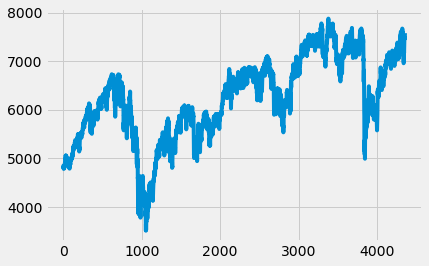

In [8]:
plt.plot(df[['close']])

In [9]:
df.head()

,open,close,high,low,volume,sma_10,wma_10,ema_10,boll_ub,boll_lb,...,ppo,roc,rsi,stoch,stochrsi,ultosc,wr,medprice,typprice,wclprice
0,4814.299805,4847.000000,4851.600098,4809.399902,1613071800,0.0,0.0,4847.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4830.500000,4836.000000,4838.750000
1,4847.000000,4806.000000,4847.000000,4806.000000,1802853600,0.0,0.0,4824.450000,4884.482756,4768.517244,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4826.500000,4819.666667,4816.250000
2,4806.000000,4824.299805,4833.299805,4806.000000,1407245400,0.0,0.0,4824.389622,4866.845239,4784.687964,...,0.0,0.0,33.151937,0.0,0.0,0.0,0.0,4819.649902,4821.199870,4821.974854
3,4824.299805,4854.100098,4863.500000,4819.799805,1635917100,0.0,0.0,4834.177900,4876.756201,4788.943750,...,0.0,0.0,58.215965,0.0,0.0,0.0,0.0,4841.649902,4845.799967,4847.875000
4,4854.100098,4840.700195,4858.899902,4833.399902,1187808600,0.0,0.0,4836.050274,4873.086779,4795.753261,...,0.0,0.0,49.031109,0.0,0.0,0.0,0.0,4846.149902,4844.333333,4843.425049


### Data Preprocessing

In [10]:
#newdata=df["open", "close"]
newdata= pd.DataFrame(df, columns = ["open", "high", "low", "close", "volume"])

In [11]:
newdata.head()

,open,high,low,close,volume
0,4814.299805,4851.600098,4809.399902,4847.000000,1613071800
1,4847.000000,4847.000000,4806.000000,4806.000000,1802853600
2,4806.000000,4833.299805,4806.000000,4824.299805,1407245400
3,4824.299805,4863.500000,4819.799805,4854.100098,1635917100
4,4854.100098,4858.899902,4833.399902,4840.700195,1187808600


In [12]:
scalingdata = np.array(newdata)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sdata= scaler.fit_transform(scalingdata)
print(sdata)

[[0.29830021 0.29658655 0.30694825 0.30579098 0.42758499]
 [0.30579098 0.2955263  0.30617447 0.29639894 0.47815406]
 [0.29639894 0.29236863 0.30617447 0.30059095 0.3727407 ]
 ...
 [0.90972188 0.91605776 0.91281092 0.90736246 0.20441362]
 [0.90736246 0.9263835  0.91317509 0.92206895 0.31029565]
 [0.92206895 0.92516187 0.92471374 0.93157553 0.27382461]]


In [14]:
scaledata= pd.DataFrame(sdata, columns = ["open", "high", "low", "close", "volume"])

In [15]:
scaledata

,open,high,low,close,volume
0,0.298300,0.296587,0.306948,0.305791,0.427585
1,0.305791,0.295526,0.306174,0.296399,0.478154
2,0.296399,0.292369,0.306174,0.300591,0.372741
3,0.300591,0.299329,0.309315,0.307417,0.433672
4,0.307417,0.298269,0.312410,0.304348,0.314270
...,...,...,...,...,...
4352,0.904499,0.905156,0.908669,0.906057,0.194192
4353,0.906057,0.907622,0.905938,0.909722,0.229775
4354,0.909722,0.916058,0.912811,0.907362,0.204414
4355,0.907362,0.926384,0.913175,0.922069,0.310296


### Splitting Dataset

In [16]:
X= scaledata.drop("close", axis=1)

In [17]:
y= scaledata["close"]

In [18]:
# Split into training and test sets
X_train, X_test , y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

### Applying models
### Lasso Regression

In [19]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [20]:
lasso_y_pred = lasso_model.predict(X_test)

In [21]:
print("Maximum Residual Error:", max_error(y_test, lasso_y_pred))
print("MAE:", mean_absolute_error(y_test, lasso_y_pred))
lmse= mean_squared_error(y_test, lasso_y_pred)
print("MSE:", lmse)
lrmse = math.sqrt(lmse)
print("RMSE:", lrmse)
print("MSLE:", mean_squared_log_error(y_test, lasso_y_pred))
print("Coefficient of Determination:", r2_score(y_test, lasso_y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, lasso_y_pred))
print("Explained variance:", explained_variance_score(y_test, lasso_y_pred))

Maximum Residual Error: 0.579427224409684
MAE: 0.16562516993394585
MSE: 0.04003738123628111
RMSE: 0.20009343126719856
MSLE: 0.01651788939936192
Coefficient of Determination: -4.170867405073331e-05
MAPE: 0.4109164553295004
Explained variance: 0.0


### Ridge Regression

In [22]:
rr = sklearn.linear_model.Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
ry_pred = lasso_model.predict(X_test)

In [23]:
print("Maximum Residual Error:", max_error(y_test, ry_pred))
print("MAE:", mean_absolute_error(y_test, ry_pred))
ridgemse= mean_squared_error(y_test, ry_pred)
print("MSE:", ridgemse)
ridgermse = math.sqrt(ridgemse)
print("RMSE:", ridgermse)
print("MSLE:", mean_squared_log_error(y_test, ry_pred))
print("Coefficient of Determination:", r2_score(y_test, ry_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, ry_pred))
print("Explained variance:", explained_variance_score(y_test, ry_pred))

Maximum Residual Error: 0.579427224409684
MAE: 0.16562516993394585
MSE: 0.04003738123628111
RMSE: 0.20009343126719856
MSLE: 0.01651788939936192
Coefficient of Determination: -4.170867405073331e-05
MAPE: 0.4109164553295004
Explained variance: 0.0


### SVR(RBF)

In [24]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

In [25]:
svrreg = svr.fit(X_train, y_train)

In [26]:
svr_y_pred = svrreg.predict(X_test)

In [27]:
print("Maximum Residual Error:", max_error(y_test, svr_y_pred))
print("MAE:", mean_absolute_error(y_test, svr_y_pred))
svrmse= mean_squared_error(y_test, svr_y_pred)
print("MSE:", svrmse)
svrrmse = math.sqrt(svrmse)
print("RMSE:", svrrmse)
print("MSLE:", mean_squared_log_error(y_test, svr_y_pred))
print("Coefficient of Determination:", r2_score(y_test, svr_y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, svr_y_pred))
print("Explained variance:", explained_variance_score(y_test, svr_y_pred))

Maximum Residual Error: 0.08589625963003988
MAE: 0.024375737501252128
MSE: 0.0007979932101639701
RMSE: 0.028248773604600434
MSLE: 0.00029800659238326534
Coefficient of Determination: 0.9800679647678977
MAPE: 0.04474604834266223
Explained variance: 0.9874665132231268


### RF (gini)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=5, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
rfy_pred = regr.predict(X_test)

In [30]:
print("Maximum Residual Error:", max_error(y_test, rfy_pred))
print("MAE:", mean_absolute_error(y_test, rfy_pred))
rfmse= mean_squared_error(y_test, rfy_pred)
print("MSE:", rfmse)
rfrmse = math.sqrt(rfmse)
print("RMSE:", rfrmse)
print("MSLE:", mean_squared_log_error(y_test, rfy_pred))
print("Coefficient of Determination:", r2_score(y_test, rfy_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, rfy_pred))
print("Explained variance:", explained_variance_score(y_test, rfy_pred))

Maximum Residual Error: 0.22338716593716051
MAE: 0.0442315694178726
MSE: 0.0028984422215754704
RMSE: 0.053837182518919675
MSLE: 0.0013604800377204954
Coefficient of Determination: 0.9276035788991434
MAPE: 0.11258482931928507
Explained variance: 0.9276037857349095


### PLS

In [31]:
from sklearn.cross_decomposition import PLSRegression

In [32]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

PLSRegression()

In [33]:
plsy_pred = pls.predict(X_test)

In [34]:
print("Maximum Residual Error:", max_error(y_test, plsy_pred))
print("MAE:", mean_absolute_error(y_test, plsy_pred))
plsmse= mean_squared_error(y_test, plsy_pred)
print("MSE:", plsmse)
plsrmse = math.sqrt(plsmse)
print("RMSE:", plsrmse)
print("MSLE:", mean_squared_log_error(y_test, plsy_pred))
print("Coefficient of Determination:", r2_score(y_test, plsy_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, plsy_pred))
print("Explained variance:", explained_variance_score(y_test, plsy_pred))

Maximum Residual Error: 0.050191992678606856
MAE: 0.006807492537290137
MSE: 9.279704965355949e-05
RMSE: 0.009633122528731766
MSLE: 4.0573602777003834e-05
Coefficient of Determination: 0.9976821431065186
MAPE: 0.014237844855077118
Explained variance: 0.9976908631164118


### Polynomial Regressor

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
pX_train, pX_test, py_train, py_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [37]:
poly_reg_model = sklearn.linear_model.LinearRegression()
poly_reg_model.fit(pX_train, py_train)

LinearRegression()

In [38]:
poly_reg_y_predicted = poly_reg_model.predict(pX_test)

In [39]:
print("Maximum Residual Error:", max_error(py_test, poly_reg_y_predicted))
print("MAE:", mean_absolute_error(py_test, poly_reg_y_predicted))
polmse= mean_squared_error(py_test, poly_reg_y_predicted)
print("MSE:", polmse)
polrmse = math.sqrt(polmse)
print("RMSE:", polrmse)
#print("MSLE:", mean_squared_log_error(py_test, poly_reg_y_predicted))
print("Coefficient of Determination:", r2_score(py_test, poly_reg_y_predicted))
print("MAPE:", mean_absolute_percentage_error(py_test, poly_reg_y_predicted))
print("Explained variance:", explained_variance_score(py_test, poly_reg_y_predicted))

Maximum Residual Error: 8.810729923425242e-13
MAE: 2.631672657571471e-13
MSE: 1.2748197332206909e-25
RMSE: 3.57046178136763e-13
Coefficient of Determination: 1.0
MAPE: 4.7431163748367566e-15
Explained variance: 1.0


<Figure size 432x288 with 0 Axes>

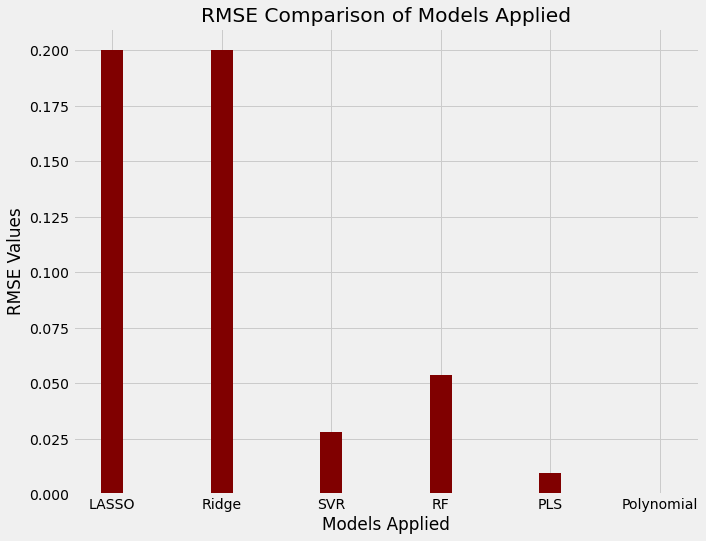

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
Models = ['LASSO', "Ridge", "SVR", "RF", "PLS", "Polynomial"]
RMSEValues = [lrmse, ridgermse, svrrmse, rfrmse, plsrmse, polrmse]

fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(Models, RMSEValues, color ='maroon',
        width = 0.2)

plt.xlabel("Models Applied")
plt.ylabel("RMSE Values")
plt.title("RMSE Comparison of Models Applied")
plt.show()